In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)


In [17]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as reg

In [19]:
binary = LinearRegression()

In [20]:
binary.fit(x[[1]], y)

LinearRegression()

In [21]:
binary.coef_

array([[95.52010745]])

In [22]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

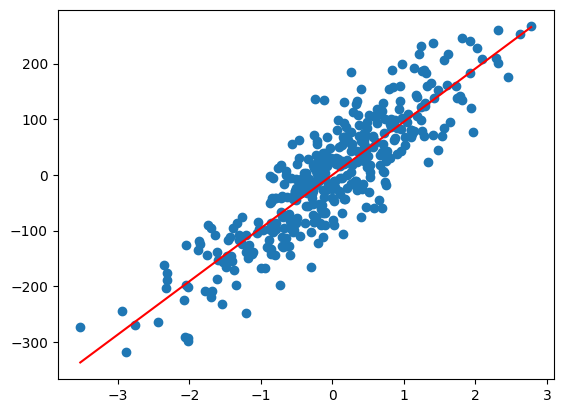

In [23]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.scatter(x[1], y)
plt.plot(xx, binary.predict(xx), c='r')


In [24]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

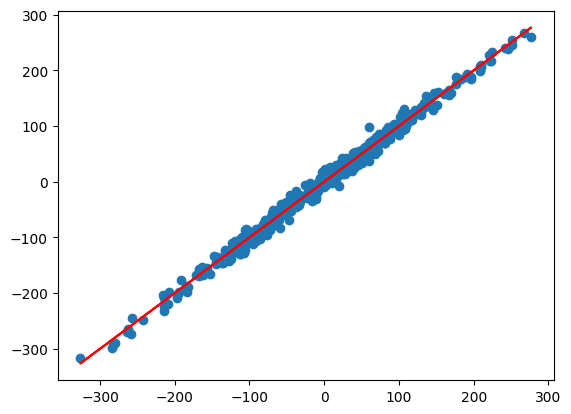

In [25]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

------------------------------------------------------------------------------------------------------------------------------------------------------

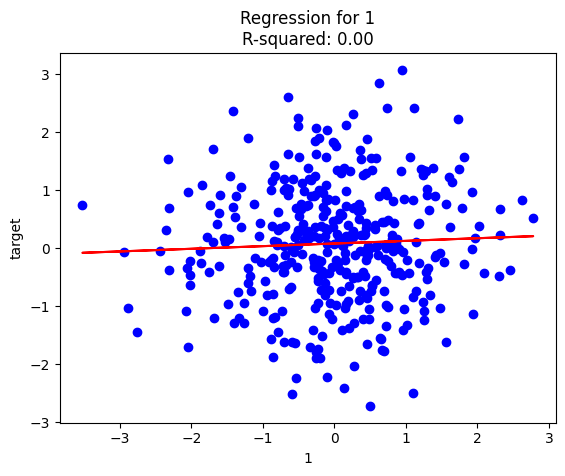

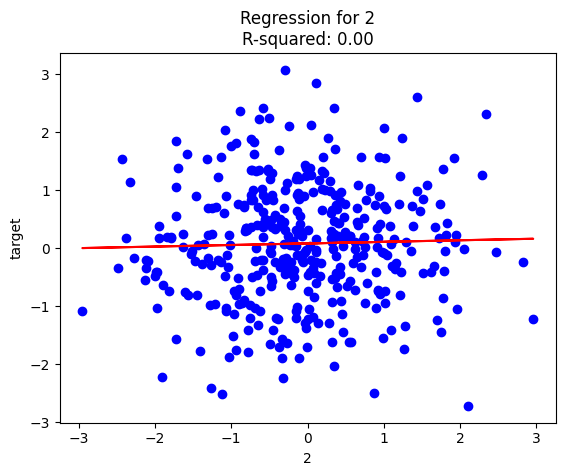

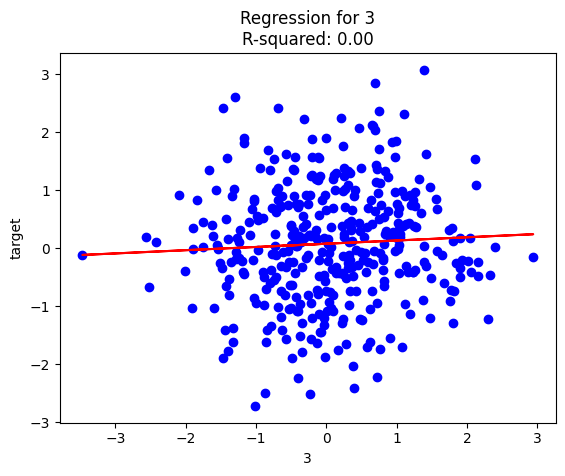

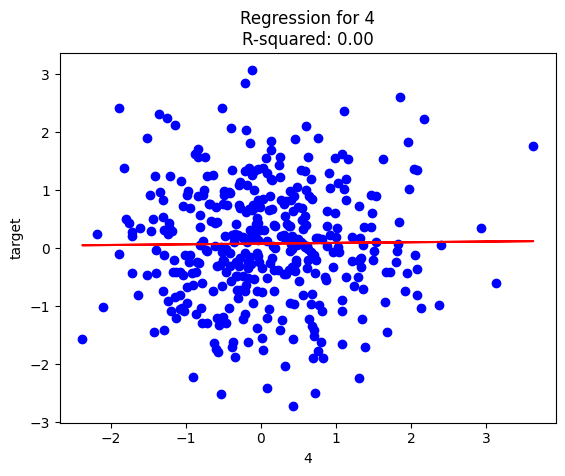

In [31]:
Xdrop = x.drop([0], axis=1)
Ydrop = x[0]

for column in Xdrop.columns:
    model = LinearRegression()
    model.fit(Xdrop[[column]], Ydrop)
    r_sq = model.score(Xdrop[[column]], Ydrop)
    plt.scatter(Xdrop[[column]], Ydrop, color='blue')
    plt.plot(Xdrop[[column]], model.predict(Xdrop[[column]]), color='red')
    plt.title(f'Regression for {column}\nR-squared: {r_sq:.2f}')
    plt.xlabel(column)
    plt.ylabel('target')
    plt.show()

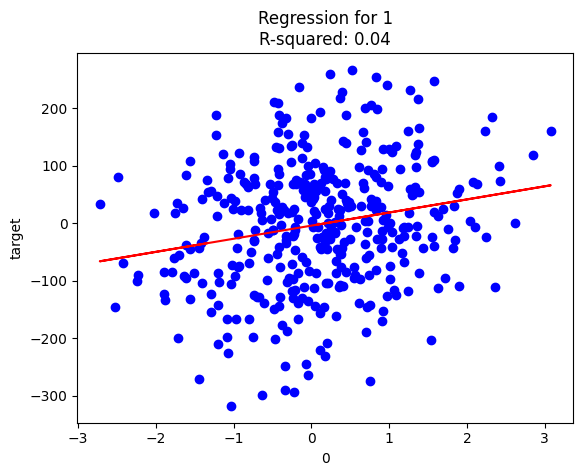

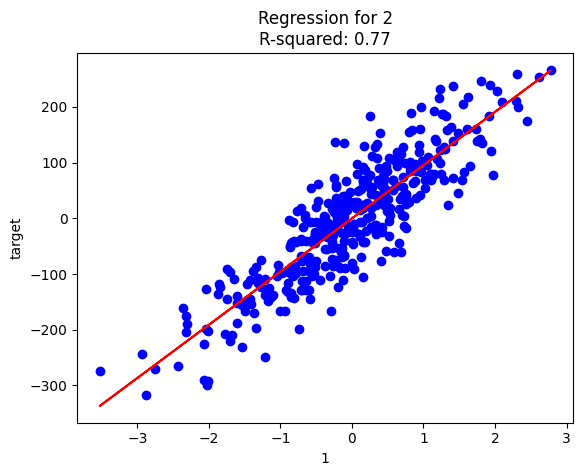

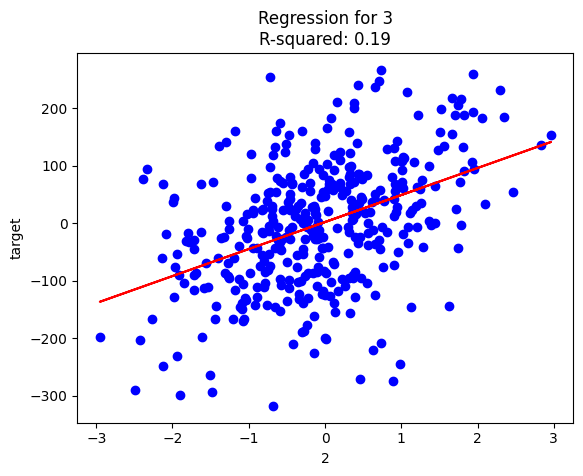

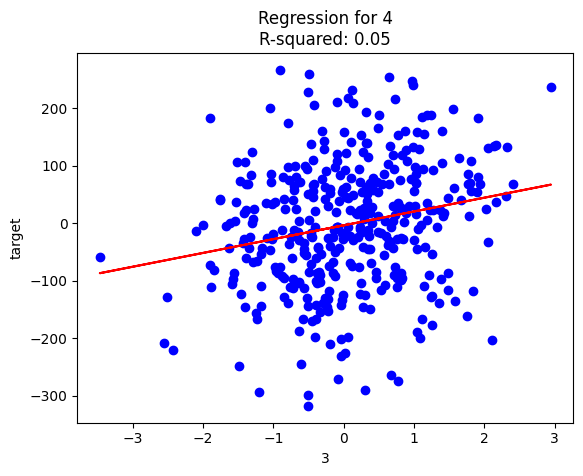

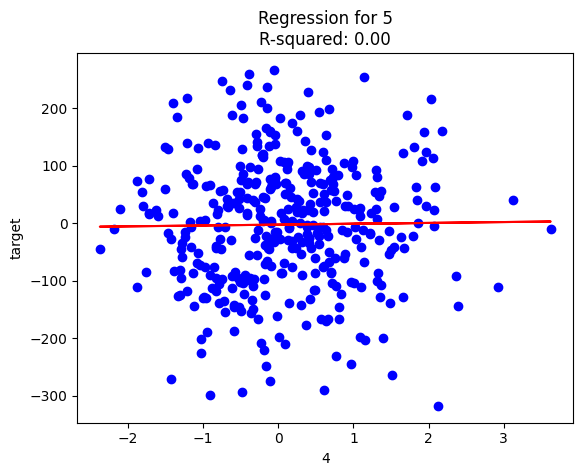

In [33]:
for column in x.columns:
    model = LinearRegression()
    model.fit(x[[column]], y)
    r_sq = model.score(x[[column]], y)
    plt.scatter(x[[column]], y, color='blue')
    plt.plot(x[[column]], model.predict(x[[column]]), color='red')
    plt.title(f'Regression for {column+1}\nR-squared: {r_sq:.2f}')
    plt.xlabel(column)
    plt.ylabel('target')
    plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures

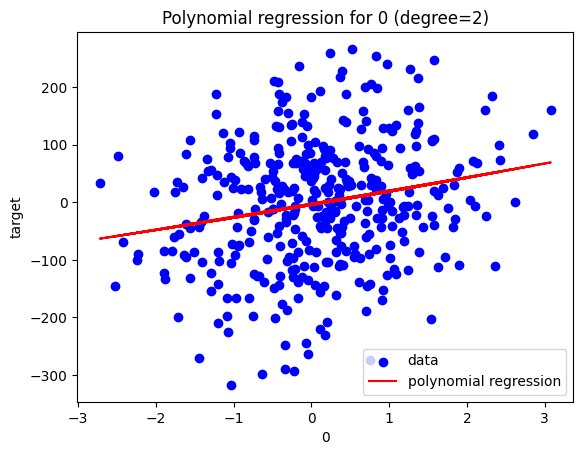

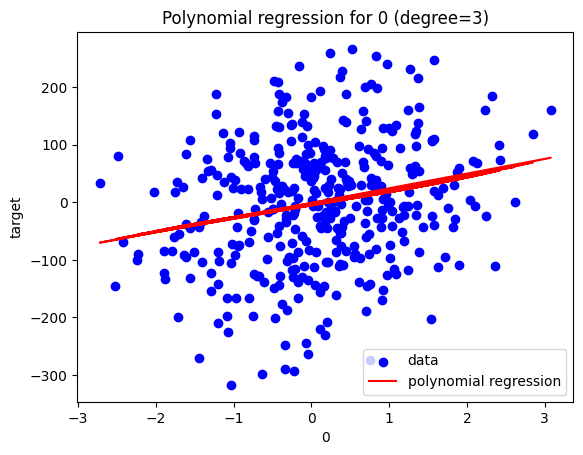

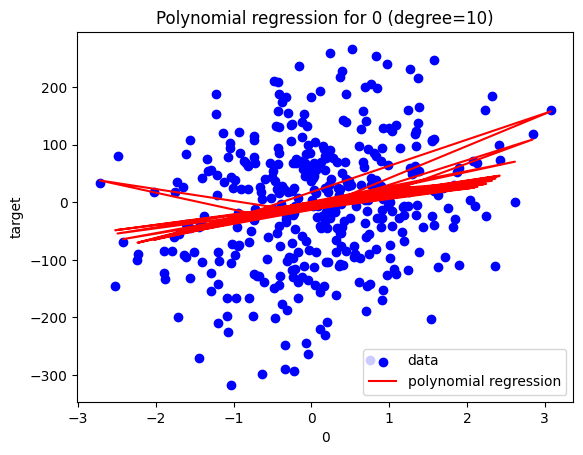

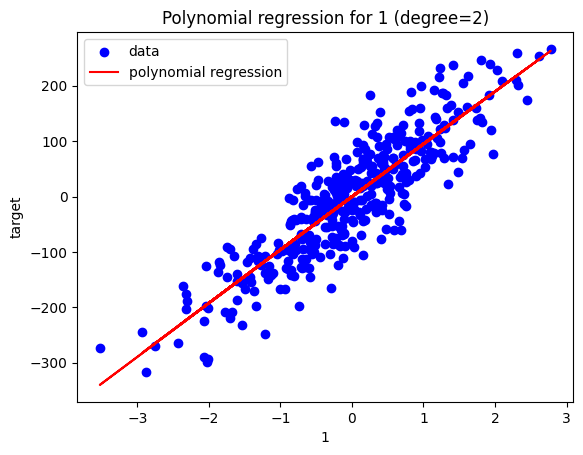

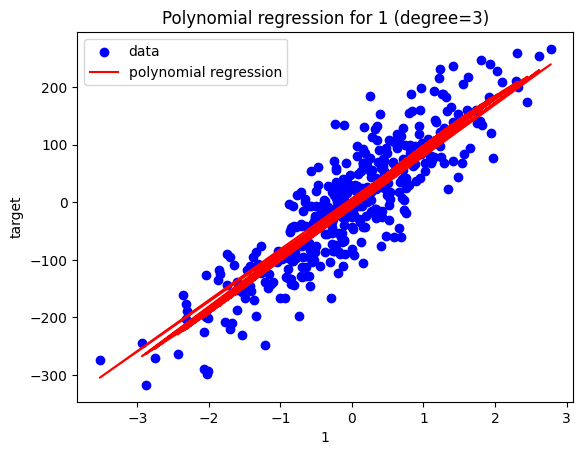

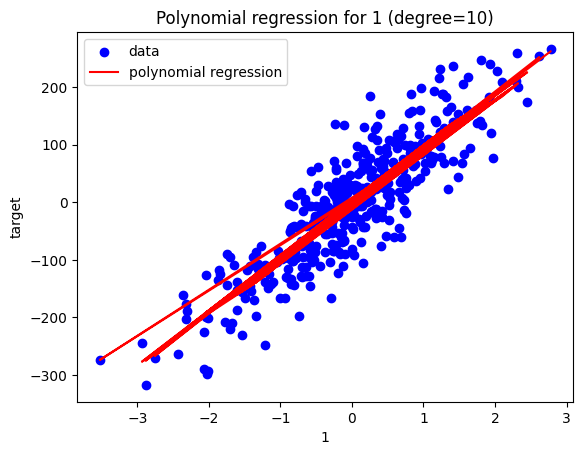

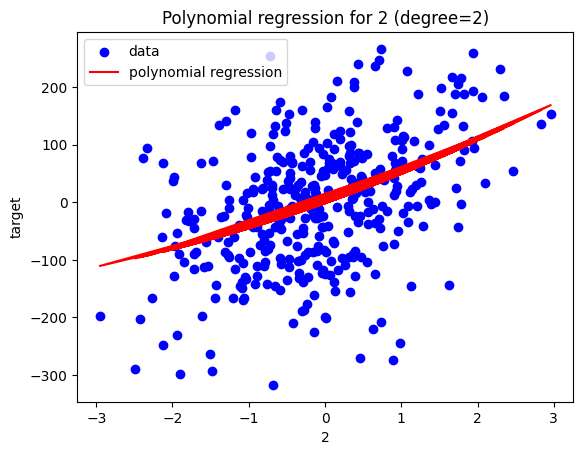

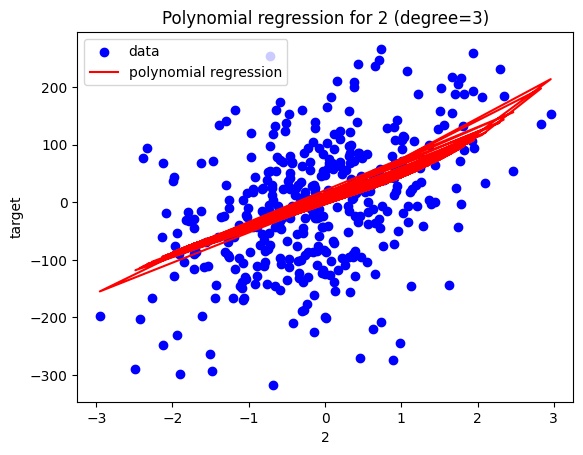

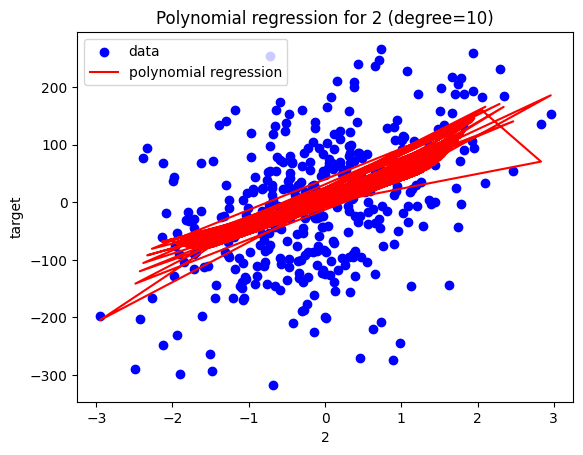

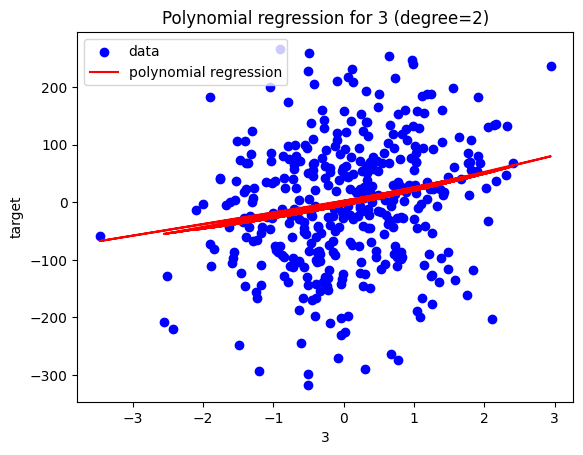

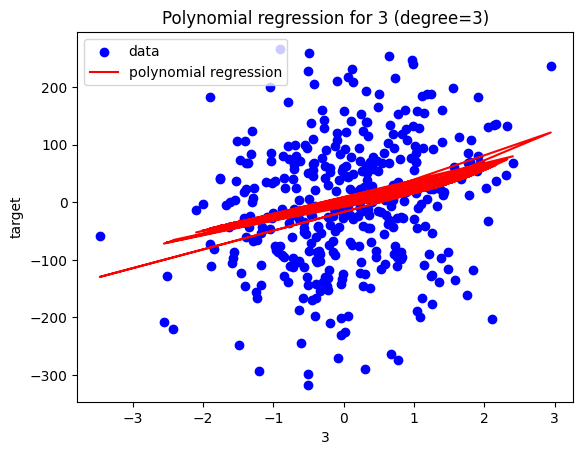

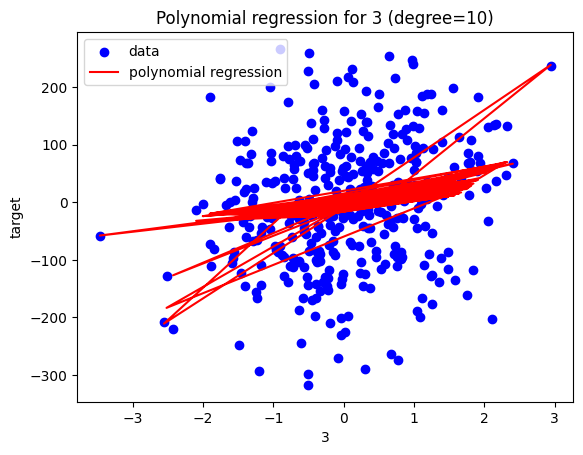

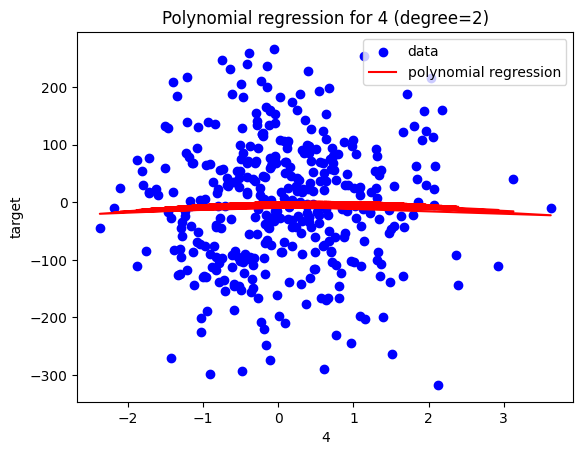

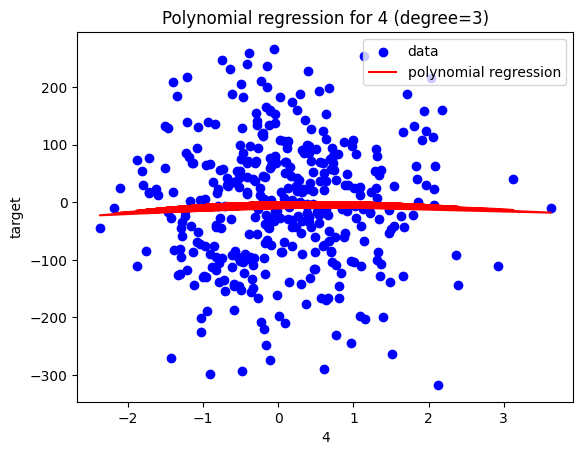

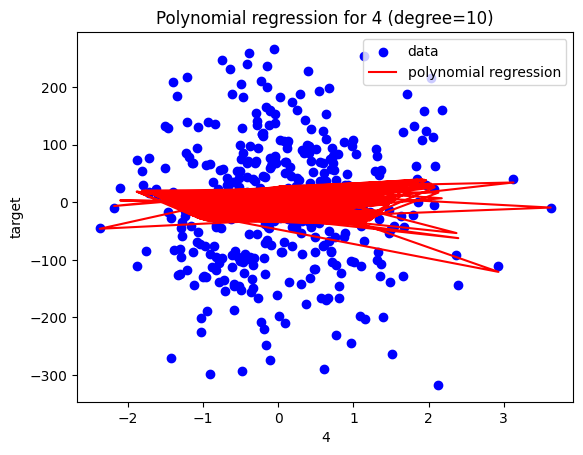

In [35]:
degrees = [2, 3, 10]

for column in x.columns:
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(x[[column]])

        model = LinearRegression()
        model.fit(X_poly, y)
        r_sq = model.score(X_poly, y)
        plt.scatter(x[column], y, color='blue', label='data')
        plt.plot(x[column], model.predict(X_poly), color='red', label='polynomial regression')
        plt.title(f'Polynomial regression for {column} (degree={degree})')
        plt.xlabel(column)
        plt.ylabel('target')
        plt.legend()
        plt.show()


In [42]:
models = []
degrees = [2, 3, 10]

for column in Xdrop.columns:
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(Xdrop[[column]])

        model = LinearRegression()
        model.fit(X_poly, Ydrop)
        r_sq = model.score(X_poly, Ydrop)
        models.append({'attribute': column, 'degree': degree, 'R-squared': r_sq})



df = pd.DataFrame(models)
pivot_table = pd.pivot_table(df, values='R-squared', index='attribute', columns='degree')


pivot_table

degree,2,3,10
attribute,,,
1,0.002377,0.003272,0.017321
2,0.004405,0.004430,0.018237
3,0.003590,0.009261,0.024637
4,0.001853,0.004131,0.029849
